# Import packages

In [1]:
from pathlib import Path
import os, sys
for p in [Path.cwd()] + list(Path.cwd().parents):
    if p.name == 'Multifirefly-Project':
        os.chdir(p)
        sys.path.insert(0, str(p / 'multiff_analysis/multiff_code/methods'))
        break


%load_ext autoreload
%autoreload 2

import sys
from data_wrangling import specific_utils, process_monkey_information, base_processing_class
from pattern_discovery import pattern_by_trials, pattern_by_points, make_ff_dataframe, ff_dataframe_utils, pattern_by_trials, pattern_by_points, cluster_analysis, organize_patterns_and_features, category_class
from decision_making_analysis.cluster_replacement import cluster_replacement_utils, plot_cluster_replacement
from decision_making_analysis.decision_making import decision_making_utils, plot_decision_making, intended_targets_classes
from decision_making_analysis.GUAT import GUAT_helper_class, GUAT_collect_info_class, GUAT_combine_info_class, add_features_GUAT_and_TAFT
from decision_making_analysis import free_selection, replacement, trajectory_info
from visualization.matplotlib_tools import plot_trials, plot_polar, additional_plots, plot_behaviors_utils, plot_statistics
from visualization.animation import animation_func, animation_utils, animation_class
from null_behaviors import sample_null_distributions, show_null_trajectory
from machine_learning.ml_methods import regression_utils, classification_utils, prep_ml_data_utils, hyperparam_tuning_class
from reinforcement_learning.base_classes import env_utils, base_env, more_envs, rl_base_class, rl_base_utils
from reinforcement_learning.agents.rnn import gru_utils, lstm_utils, lstm_utils, lstm_class, gru_class
from reinforcement_learning.agents.feedforward import interpret_neural_network, sb3_class, sb3_utils

from eye_position_analysis import eye_positions
from neural_data_analysis.neural_analysis_tools.model_neural_data import neural_data_modeling
from decision_making_analysis.compare_GUAT_and_TAFT import find_GUAT_or_TAFT_trials
from reinforcement_learning.agents.feedforward import interpret_neural_network, sb3_class, sb3_utils

import os, sys
import torch
import numpy as np
import pickle
from gymnasium import spaces, Env
import torch
import optuna
from numpy import pi
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from torch.linalg import vector_norm
from IPython.display import HTML
from functools import partial
from optuna.pruners import MedianPruner
from optuna.samplers import TPESampler
import gc
from importlib import reload
plt.rcParams["animation.html"] = "html5"
torch.set_printoptions(sci_mode=False)
np.set_printoptions(suppress=True)

device_idx = 0
# device = torch.device("cuda:" + str(device_idx) if torch.cuda.is_available() else "cpu")
## if using Jupyter Notebook
device = "mps" if torch.backends.mps.is_available() else "cpu"
model_folder_name = "RL_models/LSTM_stored_models/all_agents/gen_0/LSTM_Aug_1_24"
os.makedirs(model_folder_name, exist_ok=True)
PLAYER = "agent"

Set up logging configuration.
Numba isn't available, making a no-op decorator


/home/cicid/miniconda3/envs/multiff_clean/lib/python3.11/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [2]:
stop!

SyntaxError: invalid syntax (3319058519.py, line 1)

# streamline everything

### oct_13

In [11]:
overall_folder = 'RL_models/GRU_stored_models/all_agents/lr3e-4_numobs3_job132779_8'

In [12]:
overall_folder = 'RL_models/GRU_stored_models/all_agents/oct_19/'
env_kwargs = {'num_obs_ff': 7,
              'add_action_to_obs': True,
              'angular_terminal_vel': 0.01,
              "dt": 0.1,
              "max_in_memory_time": 2,
            }   
rl = gru_class.GRUforMultifirefly(overall_folder=overall_folder,
                                                **env_kwargs)

# rl.streamline_everything(currentTrial_for_animation=None, num_trials_for_animation=None, duration=[10, 40],
#                          best_model_postcurriculum_exists_ok=True)
                                             

model_folder_name: RL_models/GRU_stored_models/all_agents/oct_19/dv1_dw1_w1_memT2


what seemed to work at last: clamping to avoid NA
other changes made

In [ ]:
load_replay_buffer = False
rl.streamline_everything(currentTrial_for_animation=None, num_trials_for_animation=None, duration=[10, 40],
                         to_load_latest_agent=True,
                         best_model_postcurriculum_exists_ok=True,
                         to_train_agent=True,
                         load_replay_buffer=False
                         )

## see animation

TIME before resetting: 0
current linear_terminal_vel:  0.01
current angular_terminal_vel:  0.64
current dt:  0.1
current dv_cost_factor:  0
current dw_cost_factor:  0
current w_cost_factor:  0
current distance2center_cost:  2
current stop_vel_cost:  50
current flash_on_interval:  3
current num_obs_ff:  3
current reward_boundary:  75
current max_in_memory_time:  2
0.10 action: [0.066 -0.99] n_targets: 1 reward: 52.40 cost_for_distance2center: 43.26 cost_for_stop_vel: 4.34
2025-10-19 16:52:42,266 - INFO - Firefly capture rate: 0.0100
Warnings: currently, only ff in obs at each step are used in ff_dataframe. All ff are labeled 'visible' regardless of their actual time since last visible.
It is possible that an RNN agent has memory of past ff; code may need updates to reflect that. For planning analysis, info of in-memory ff is not needed.
made ff_dataframe
Number of frames is: 298
Number of frames for the animation is: 298
Saving animation as: RL_models/GRU_stored_models/all_collected_dat

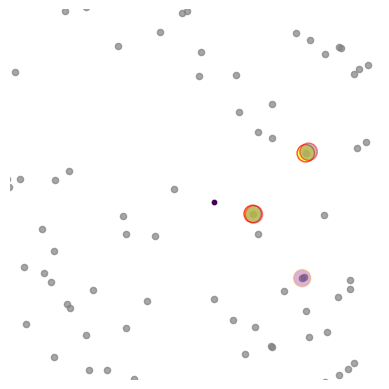

In [8]:
# rl.make_env(**rl.env_kwargs)
# rl.make_agent()
# # rl.make_initial_env_for_curriculum_training()
# rl.load_best_model_postcurriculum()
rl.streamline_making_animation(currentTrial_for_animation=None, num_trials_for_animation=None, duration=[10, 40], n_steps=1000, video_dir=None)
from IPython.display import Video
Video(rl.video_path_name, embed=True)

In [6]:
reload(gru_utils)

<module 'reinforcement_learning.agents.rnn.gru_utils' from '/user_data/cicid/Multifirefly-Project/multiff_analysis/multiff_code/methods/reinforcement_learning/agents/rnn/gru_utils.py'>

## manually eval

In [10]:
avg_reward = gru_utils.evaluate_gru_agent(
    rl.env, rl.sac_model, 512, 2, deterministic=True)
print(
    f"Best average reward: {rl.best_avg_reward}, Current average reward: {avg_reward}")


TIME before resetting: 14.599999999999964
current linear_terminal_vel:  0.01
current angular_terminal_vel:  0.64
current dt:  0.1
current dv_cost_factor:  0.5
current dw_cost_factor:  0.5
current w_cost_factor:  0.5
current distance2center_cost:  2
current stop_vel_cost:  50
current flash_on_interval:  3
current num_obs_ff:  7
current reward_boundary:  75
current max_in_memory_time:  2

 episode:  31
mean:  tensor([[[-0.0363, -1.3261]]]) std:  tensor([[[0.8540, 0.7732]]]) action:  [[[-0.03625 -0.8683 ]]]
mean:  tensor([[[-0.0363, -1.3261]]]) std:  tensor([[[0.8540, 0.7732]]]) action:  [[[-0.03625 -0.8683 ]]]
mean:  tensor([[[-0.0651, -1.3743]]]) std:  tensor([[[0.8879, 0.7676]]]) action:  [[[-0.06505 -0.87966]]]
mean:  tensor([[[-0.0378, -1.3088]]]) std:  tensor([[[0.8637, 0.7846]]]) action:  [[[-0.03783 -0.86396]]]
mean:  tensor([[[-0.0205, -1.1148]]]) std:  tensor([[[0.8634, 0.8339]]]) action:  [[[-0.02047 -0.80576]]]
mean:  tensor([[[-0.0069, -1.1162]]]) std:  tensor([[[0.8635, 0.83